# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [2]:
import mu2
?mu2.Interaction

In [1]:
import numpy as np
from scipy import optimize

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)
gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0, _ = sys.a0_and_r0(g, 0, momenta, use_c=True)
    return (1/he4.A0 - 1/a0)*he4.A0

In [4]:
N1 = 2
N2 = 8
NCT = 8
s = he4.NonlocalHelium4System(Rs[0], ELL, N1, N2, NCT)

In [5]:
guess = 803*X
s.a0_and_r0(guess, 0, momenta, use_c=True), s.bound_state_spectrum(guess, 0)

((100.77342392204551, 8.542505607073055), array([-0.00130919]))

In [9]:
?mu2.Interaction

In [23]:
for i in range(nR):
    R = Rs[i]
    s = he4.NonlocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 0  R = 2.7706  g = 8.0275e+02 X  a0 = 1.0000e+02  r0 = 8.5391e+00  b2 = 1.3305e-03
i = 1  R = 2.6108  g = 1.7620e+03 X  a0 = 1.0000e+02  r0 = 8.3037e+00  b2 = 1.3266e-03


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [24]:
restart = 2
s = he4.NonlocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [36]:
guess = -635*X
inverse_a0_diff(guess, s)

0.006858824932182497

In [37]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.NonlocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 2  R = 2.4684  g = -6.3769e+02 X  a0 = 1.0000e+02  r0 = 8.1211e+00  b2 = 1.3236e-03
i = 3  R = 2.3407  g = 2.6136e+02 X  a0 = 1.0000e+02  r0 = 7.9838e+00  b2 = 1.3213e-03
i = 4  R = 2.2256  g = 5.4388e+02 X  a0 = 1.0000e+02  r0 = 7.8845e+00  b2 = 1.3197e-03
i = 5  R = 2.1213  g = 7.4644e+02 X  a0 = 1.0000e+02  r0 = 7.8165e+00  b2 = 1.3186e-03
i = 6  R = 2.0263  g = 9.3126e+02 X  a0 = 1.0000e+02  r0 = 7.7732e+00  b2 = 1.3179e-03
i = 7  R = 1.9394  g = 1.1160e+03 X  a0 = 1.0000e+02  r0 = 7.7487e+00  b2 = 1.3175e-03
i = 8  R = 1.8597  g = 1.3081e+03 X  a0 = 1.0000e+02  r0 = 7.7373e+00  b2 = 1.3174e-03
i = 9  R = 1.7863  g = 1.5114e+03 X  a0 = 1.0000e+02  r0 = 7.7343e+00  b2 = 1.3173e-03
i = 10  R = 1.7185  g = 1.7285e+03 X  a0 = 1.0000e+02  r0 = 7.7356e+00  b2 = 1.3173e-03
i = 11  R = 1.6556  g = 1.9615e+03 X  a0 = 1.0000e+02  r0 = 7.7379e+00  b2 = 1.3174e-03
i = 12  R = 1.5972  g = 2.2122e+03 X  a0 = 1.0000e+02  r0 = 7.7385e+00  b2 = 1.3174e-03
i = 13  R = 1.5427  g = 2.4824e+03 X  a

In [38]:
restart = 20
s = he4.NonlocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [51]:
guess = 5.184e3*X
inverse_a0_diff(guess, s)

-0.0029493624763975157

In [52]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.NonlocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 20  R = 1.2455  g = 5.1841e+03 X  a0 = 1.0000e+02  r0 = 7.6030e+00  b2 = 1.3152e-03
i = 21  R = 1.2121  g = 5.7812e+03 X  a0 = 1.0000e+02  r0 = 7.5758e+00  b2 = 1.3148e-03
i = 22  R = 1.1805  g = 6.5108e+03 X  a0 = 1.0000e+02  r0 = 7.5494e+00  b2 = 1.3143e-03
i = 23  R = 1.1505  g = 7.4892e+03 X  a0 = 1.0000e+02  r0 = 7.5246e+00  b2 = 1.3140e-03


In [53]:
restart = 24
s = he4.NonlocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [65]:
guess = 9.08e3*X
inverse_a0_diff(guess, s)

0.009635201226934273

In [66]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.NonlocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 24  R = 1.1220  g = 9.0764e+03 X  a0 = 1.0000e+02  r0 = 7.5019e+00  b2 = 1.3136e-03
i = 25  R = 1.0948  g = 1.3241e+04 X  a0 = 1.0000e+02  r0 = 7.4819e+00  b2 = 1.3133e-03


In [67]:
restart = 26
s = he4.NonlocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [78]:
guess = -5.3e4*X
inverse_a0_diff(guess, s)

-0.004461378655934607

In [79]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.NonlocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 26  R = 1.0690  g = -5.2396e+04 X  a0 = 1.0000e+02  r0 = 7.4648e+00  b2 = 1.3130e-03
i = 27  R = 1.0443  g = 1.5911e+03 X  a0 = 1.0000e+02  r0 = 7.4506e+00  b2 = 1.3128e-03
i = 28  R = 1.0208  g = 4.8214e+03 X  a0 = 1.0000e+02  r0 = 7.4393e+00  b2 = 1.3126e-03
i = 29  R = 0.9982  g = 6.3472e+03 X  a0 = 1.0000e+02  r0 = 7.4308e+00  b2 = 1.3125e-03
i = 30  R = 0.9767  g = 7.4340e+03 X  a0 = 1.0000e+02  r0 = 7.4249e+00  b2 = 1.3124e-03
i = 31  R = 0.9561  g = 8.3566e+03 X  a0 = 1.0000e+02  r0 = 7.4209e+00  b2 = 1.3123e-03
i = 32  R = 0.9363  g = 9.2102e+03 X  a0 = 1.0000e+02  r0 = 7.4187e+00  b2 = 1.3123e-03
i = 33  R = 0.9173  g = 1.0037e+04 X  a0 = 1.0000e+02  r0 = 7.4180e+00  b2 = 1.3123e-03
i = 34  R = 0.8991  g = 1.0860e+04 X  a0 = 1.0000e+02  r0 = 7.4182e+00  b2 = 1.3123e-03
i = 35  R = 0.8816  g = 1.1691e+04 X  a0 = 1.0000e+02  r0 = 7.4190e+00  b2 = 1.3123e-03
i = 36  R = 0.8647  g = 1.2539e+04 X  a0 = 1.0000e+02  r0 = 7.4201e+00  b2 = 1.3123e-03
i = 37  R = 0.8485  g = 1.3410e

In [80]:
import matplotlib.pyplot as plt

plt.style.use('science')
gr = 4/3
h = 3

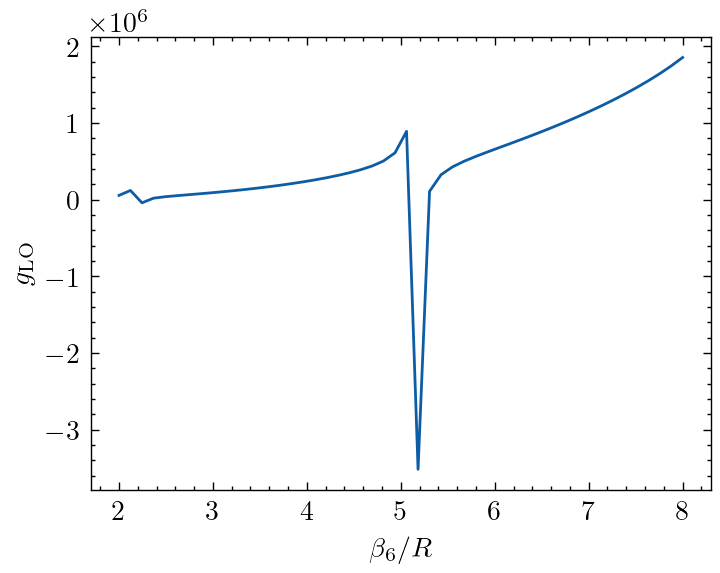

In [83]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, gs)

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

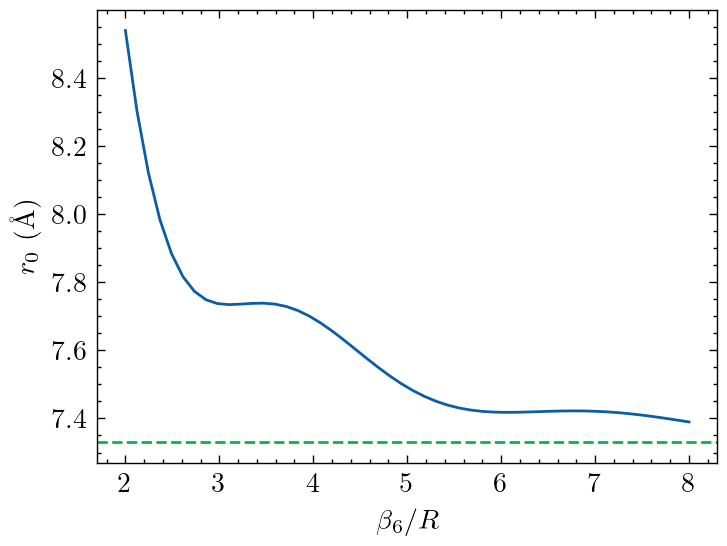

In [84]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s)
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [85]:
np.savetxt(f'datfiles/he4plusplus_LO_nonlocal_{N1}_{N2}_{NCT}_rg_flow.txt', np.vstack((Rs, gs)).T, header='R (Å)  g ()')
np.savetxt(f'datfiles/he4plusplus_LO_nonlocal_{N1}_{N2}_{NCT}_r0s.txt', np.vstack((Rs, r0s)).T, header='R (Å)  r_0 (Å)')

In [86]:
soft = np.loadtxt('datfiles/he4plus_LO_nonlocal_rg_flow.txt')

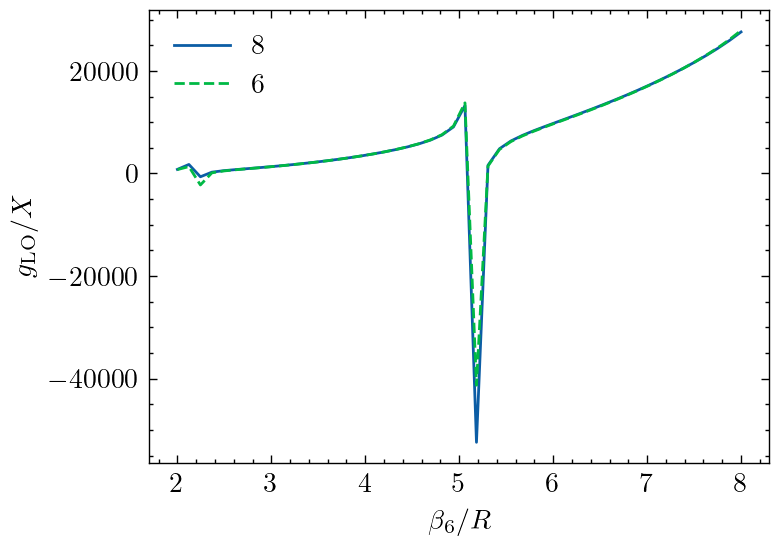

In [92]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, gs/X, label='8')
ax.plot(he4.BETA6/soft[:, 0], soft[:, 1]/X, linestyle='--', label='6')

ax.legend()
ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}/X$');

In [93]:
soft_r0 = np.loadtxt('datfiles/he4plus_LO_nonlocal_r0s.txt')

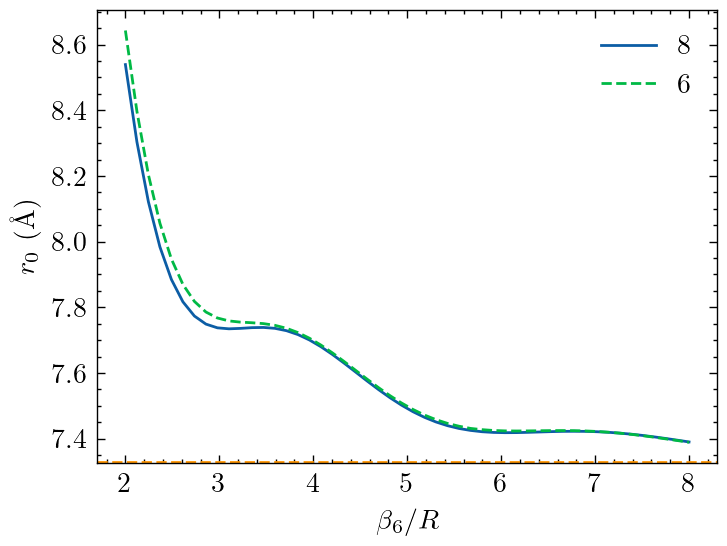

In [95]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s, label='8')
ax.plot(he4.BETA6/soft_r0[:, 0], soft_r0[:, 1], linestyle='--', label='6')
ax.axhline(he4.R0, color='C2', linestyle='--')

ax.legend()
ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');